

# Portfolio Management-Eigen Portfolio

In this case study we use dimensionality reduction techniques for portfolio management and allocation.


## Content

* [1. Problem Definition](#0)
* [2. Getting Started - Load Libraries and Dataset](#1)
    * [2.1. Load Libraries](#1.1)    
    * [2.2. Load Dataset](#1.2)
* [3. Exploratory Data Analysis](#2)
    * [3.1 Descriptive Statistics](#2.1)    
    * [3.2. Data Visualisation](#2.2)
* [4. Data Preparation](#3)
    * [4.1 Data Cleaning](#3.1)
    * [4.3.Data Transformation](#3.2)  
* [5.Evaluate Algorithms and Models](#4)        
    * [5.1. Train Test Split](#4.1)
    * [5.2. Model Evaluation- Applying Principle Component Analysis](#4.2)
        * [5.2.1. Explained Variance using PCA](#4.2.1)
        * [5.2.2. Looking at Portfolio weights](#4.2.2)
        * [5.2.3. Finding the Best Eigen Portfolio](#4.2.3)
        * [5.2.4. Backtesting Eigenportfolio](#4.2.4)

<a id='0'></a>
# 1. Problem Definition

Our goal in this case study is to maximize risk-adjusted returns using dimensionality
reduction-based algorithm on a dataset of stocks to allocate capital into different asset
classes.

The dataset used for this case study is ETFs and sotcks from Chile's roboadvisors from year 2010 onwards till 2022. The dataset can be downloaded from
yahoo finance.

https://www.soyfocus.com/


<a id='1'></a>
# 2. Getting Started- Loading the data and python packages

<a id='1.1'></a>
## 2.1. Loading the python packages

In [45]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv, set_option
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import yfinance as yf
import scipy

<a id='1.2'></a>
## 2.2. Loading the Data

help(yf.Ticker)

In [2]:

stocks_names = ["ITOT","IVV","QQQ","VTI","CXSE","IJR","0LMR.L",
                "VPL","VWO","SUSA","CEMB","HYEM","MGV","USHY"]

In [3]:
dataset = pd.DataFrame()

In [4]:
stocks = []
for s in stocks_names:
    value = yf.Ticker(s).history(period = "10y").Close
    dat = pd.DataFrame({"{}".format(s): value})
    dataset = pd.concat([dataset,dat],axis = 1)

<a id='2'></a>
# 3. Exploratory Data Analysis

<a id='2.1'></a>
## 3.1. Descriptive Statistics

In [5]:
# shape
dataset.shape

(2518, 14)

In [50]:
# peek at data
set_option('display.width', 100)
dataset.head(5)

,ITOT,IVV,QQQ,VTI,CXSE,IJR,0LMR.L,VPL,VWO,SUSA,CEMB,HYEM,MGV,USHY
Date,,,,,,,,,,,,,,
2012-12-10,26.787,118.608,59.237,60.885,24.014,33.223,NaN,39.921,32.849,25.677,35.782,14.664,33.176,NaN
2012-12-11,26.960,119.295,60.011,61.268,24.049,33.514,NaN,40.074,33.016,25.824,35.636,14.785,33.394,NaN
2012-12-12,26.948,119.461,59.883,61.293,24.036,33.345,NaN,40.257,33.145,25.793,35.656,14.736,33.495,NaN
2012-12-13,26.832,118.715,59.410,60.944,23.784,33.171,NaN,40.104,32.986,25.677,35.649,14.752,33.285,NaN
2012-12-14,26.671,118.301,58.846,60.686,23.987,33.106,NaN,40.181,33.153,25.608,35.835,14.752,33.230,NaN


In [52]:
# describe data
set_option('precision', 3)
dataset.describe()

,ITOT,IVV,QQQ,VTI,CXSE,IJR,0LMR.L,VPL,VWO,SUSA,CEMB,HYEM,MGV,USHY
count,2519.000,2519.000,2519.000,2519.000,2441.000,2519.000,1.00,2519.000,2519.000,2519.000,2518.000,2519.000,2519.000,1283.000
mean,57.901,255.414,174.312,130.610,34.960,68.482,56.95,57.920,36.956,54.693,40.842,17.497,65.567,36.271
std,21.295,94.870,94.239,47.882,13.002,21.341,NaN,10.585,6.321,21.098,4.916,2.212,19.756,2.110
min,26.533,117.291,58.341,60.371,17.781,33.106,56.95,39.921,23.812,25.502,31.992,13.777,32.911,27.538
25%,40.848,179.955,99.833,92.418,23.832,50.316,56.95,48.462,32.429,37.996,36.209,15.393,49.272,34.463
50%,54.147,237.648,149.396,121.725,33.090,65.382,56.95,57.755,35.786,50.176,40.540,17.571,64.209,37.136
75%,70.355,312.732,237.907,158.409,41.118,79.852,56.95,64.332,40.398,66.398,44.653,19.028,75.260,37.908
max,106.431,474.319,401.487,240.230,79.277,118.389,56.95,82.723,53.773,105.568,50.104,21.911,107.723,39.919


**Obs**
Not all rows have the same number of data, this means that there are null o NAN values filled in. To do afair comparions we have to deal with them

<a id='2.2'></a>
## 3.2. Data Visualization

Taking a look at the correlation. More detailed look at the data will be performed after implementing the Dimensionality Reduction Models.

<AxesSubplot:title={'center':'Correlation Matrix'}>

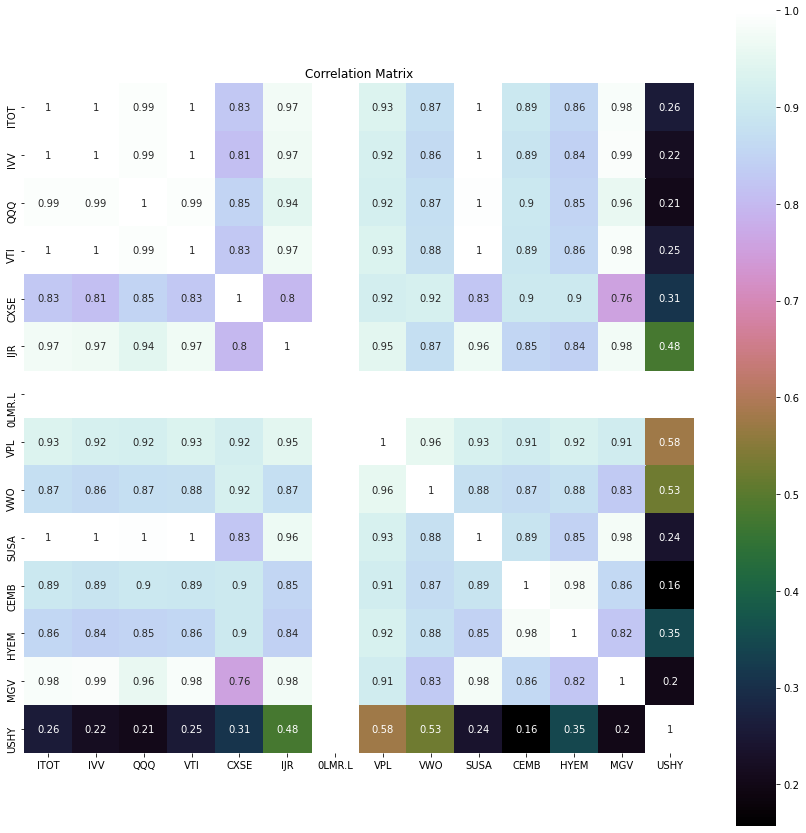

In [53]:
# correlation
correlation = dataset.corr()
plt.figure(figsize=(15,15))
plt.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

As it can be seen by the chart above, there is a significant positive correlation between
the stocks. 

<a id='3'></a>
## 4. Data Preparation

<a id='3.1'></a>
## 4.1. Data Cleaning
Let us check for the NAs in the rows, either drop them or fill them with the mean of the column

In [54]:
#Checking for any null values and removing the null values'''
print('Null Values =',dataset.isnull().values.any())

Null Values = True


Getting rid of the columns with more than 30% missing values. 

In [6]:
missing_fractions = dataset.isnull().mean().sort_values(ascending=False)

missing_fractions.head(10)

drop_list = sorted(list(missing_fractions[missing_fractions > 0.3].index))

dataset.drop(labels=drop_list, axis=1, inplace=True)
dataset.shape

(2518, 12)

Given that there are null values drop the rown contianing the null values.

In [7]:
# Fill the missing values with the last value available in the dataset. 
dataset=dataset.fillna(method='ffill')

# Drop the rows containing NA
dataset= dataset.dropna(axis=0)
# Fill na with 0
#dataset.fillna('0')

dataset.head(2)

,ITOT,IVV,QQQ,VTI,CXSE,IJR,VPL,VWO,SUSA,CEMB,HYEM,MGV
Date,,,,,,,,,,,,
2012-12-19,27.011250,119.601280,60.274323,61.776295,24.220966,33.894287,41.144772,33.395126,25.978491,35.389896,14.829306,33.688843
2012-12-20,27.172701,120.265663,60.274323,62.115932,24.379766,34.094589,41.569351,33.624912,26.073742,35.449356,14.862341,33.929291


Computing Daily Return

In [76]:
# Daily Log Returns (%)
# datareturns = np.log(data / data.shift(1)) 

# Daily Linear Returns (%)
datareturns = dataset.pct_change(1)

#Remove Outliers beyong 3 standard deviation
datareturns= datareturns[datareturns.apply(lambda x :(x-x.mean()).abs()<(3*x.std()) ).all(1)]

In [128]:
help(dataset.pct_change)

Help on method pct_change in module pandas.core.generic:

pct_change(periods=1, fill_method='pad', limit=None, freq=None, **kwargs) -> 'FrameOrSeries' method of pandas.core.frame.DataFrame instance
    Percentage change between the current and a prior element.
    
    Computes the percentage change from the immediately previous row by
    default. This is useful in comparing the percentage of change in a time
    series of elements.
    
    Parameters
    ----------
    periods : int, default 1
        Periods to shift for forming percent change.
    fill_method : str, default 'pad'
        How to handle NAs before computing percent changes.
    limit : int, default None
        The number of consecutive NAs to fill before stopping.
    freq : DateOffset, timedelta, or str, optional
        Increment to use from time series API (e.g. 'M' or BDay()).
    **kwargs
        Additional keyword arguments are passed into
        `DataFrame.shift` or `Series.shift`.
    
    Returns
    ----

<a id='3.2'></a>
## 4.2. Data Transformation

Below we use StandardScaler in sklearn to standardize the dataset’s features onto unit scale (mean = 0 and variance = 1).
Standardization is a useful technique to transform attributes to a distribution with a mean of
0 and a standard deviation of 1.

The heatmap and the plot above shown the contribution of different stocks in each
eigenvector.

<a id='4.2.3'></a>
## 5.2.3. Finding the Best Eigen Portfolio

In order to find the best eigen portfolios and perform backtesting in the next step, we use the sharpe ratio, which is a performance
metric that explains the annualized returns against the annualized volatility of each company in a portfolio. A high sharpe ratio explains higher returns and/or lower volatility for the specified portfolio. The annualized sharpe ratio is computed by dividing
the annualized returns against the annualized volatility. For annualized return we
apply the geometric average of all the returns in respect to the periods per year (days
of operations in the exchange in a year). Annualized volatility is computed by taking the standard deviation of the returns and multiplying it by the square root of the peri‐
ods per year.

In [68]:
# Sharpe Ratio
def sharpe_ratio(ts_returns, periods_per_year=252):
    '''
    Sharpe ratio is the average return earned in excess of the risk-free rate per unit of volatility or total risk.
    It calculares the annualized return, annualized volatility, and annualized sharpe ratio.
    
    ts_returns are  returns of a signle eigen portfolio.
    '''
    n_years = ts_returns.shape[0]/periods_per_year
    annualized_return = np.power(np.prod(1+ts_returns),(1/n_years))-1
    annualized_vol = ts_returns.std() * np.sqrt(periods_per_year)
    annualized_sharpe = annualized_return / annualized_vol

    return annualized_return, annualized_vol, annualized_sharpe

In [12]:
import cvxopt as opt
from cvxopt import blas, solvers

$$
\mathcal{L} = \bar{x}^T \mu \mathbf{S} \bar{x}  - \mathbf{R}  x\\
\sum x = 1 \\
 x_{i} > 0 
$$

## Minimization V0

In [43]:
def L(x,cov,mu,R):
    return x.dot(cov*mu).dot(x) - R.dot(x)

In [ ]:
def const_unity(x):
    return sum(x)-1
def const_positive(x):
    return sum(x)-1

In [68]:
from cvxopt.blas import dot
from cvxopt.solvers import qp
from math import sqrt
import pylab

In [161]:
riskTolerance = 1
mus = 1-riskTolerance
n = len(datareturns.T)
print(n)
# Convert to cvxopt matrices
S = opt.matrix(np.cov(datareturns.T))
pbar = opt.matrix(np.mean(datareturns.T, axis=1))

# Create constraint matrices
G = opt.matrix(0.0, (n,n))
G[::n+1] = -1.0   # negative n x n identity matrix
h = opt.matrix(0.0, (n ,1))
A = opt.matrix(1.0, (1, n))
b = opt.matrix(1.0)

# Calculate efficient frontier weights using quadratic programming
#portfolios = solvers.qp(mus*S, -pbar, G, h, A, b)
#w=portfolios['x'].T

12


In [170]:
N = 100
mus = [ 10**(5.0*t/N-1.0) for t in range(N) ]
portfolios = [ solvers.qp(mu*S, -pbar, G, h, A, b,verbose = False)['x'] for mu in mus ];

     pcost       dcost       gap    pres   dres
 0: -5.5202e-04 -1.0009e+00  1e+00  0e+00  4e+00
 1: -5.5213e-04 -1.0942e-02  1e-02  1e-16  4e-02
 2: -5.6228e-04 -1.0423e-03  5e-04  4e-17  2e-03
 3: -8.8404e-04 -1.0766e-03  2e-04  2e-16  1e-04
 4: -9.2982e-04 -9.4213e-04  1e-05  2e-16  8e-06
 5: -9.4066e-04 -9.4078e-04  1e-07  1e-16  8e-08
 6: -9.4077e-04 -9.4077e-04  1e-09  2e-16  8e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -5.5171e-04 -1.0009e+00  1e+00  1e-17  4e+00
 1: -5.5182e-04 -1.0942e-02  1e-02  5e-17  4e-02
 2: -5.6195e-04 -1.0417e-03  5e-04  5e-17  2e-03
 3: -8.8333e-04 -1.0757e-03  2e-04  3e-16  1e-04
 4: -9.2909e-04 -9.4141e-04  1e-05  2e-16  8e-06
 5: -9.3994e-04 -9.4007e-04  1e-07  3e-16  8e-08
 6: -9.4005e-04 -9.4006e-04  1e-09  3e-16  8e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -5.5136e-04 -1.0009e+00  1e+00  6e-17  4e+00
 1: -5.5147e-04 -1.0941e-02  1e-02  7e-17  4e-02
 2: -5.6159e-04 -1.0412e

In [171]:
returns = [ dot(x,pbar)*100 for x in portfolios ]
risks = [ sqrt(dot(x,S*x))*100 for x in portfolios ]
#print (w)

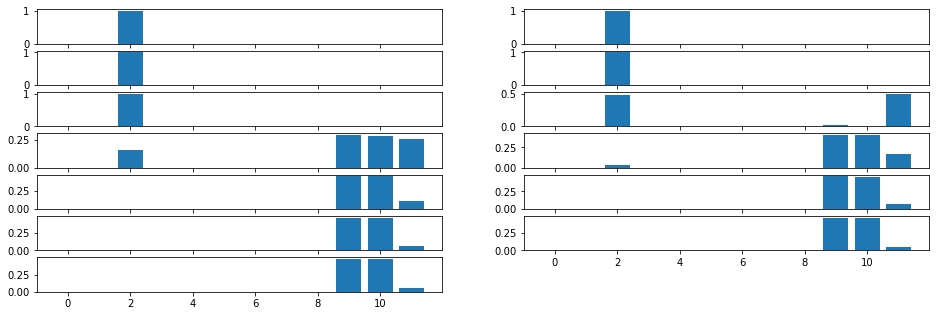

In [192]:
N_fig = len(portfolios[0])
i = 1
fig = plt.figure(figsize = (16,9))
for x in portfolios[::int(len(portfolios)/12)]:
    try:
        plt.subplot(N_fig,2,i)
        plt.bar(range(len(x)),x)
        i+=1
    except:
        continue


Text(0.5, 1.0, 'Risk-return trade-off curve (fig 4.12)')

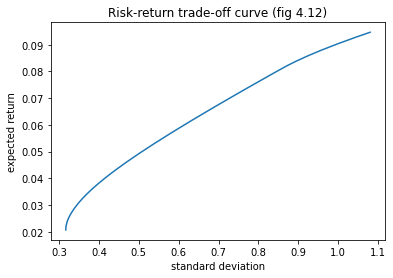

In [172]:
# Plot trade-off curve and optimal allocations.
pylab.figure(1, facecolor='w')
pylab.plot(risks, returns)
pylab.xlabel('standard deviation')
pylab.ylabel('expected return')
#pylab.axis([0, 0.2, 0, 0.15])
pylab.title('Risk-return trade-off curve (fig 4.12)')
#pylab.yticks([0.00, 0.05, 0.10, 0.15])